# Tara Saba 9731037

## Part I

## Importing libraries


In [450]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import tensorflow 
from tensorflow import keras

Creating and visualizing the circles 

In [10]:
samples, labels = make_circles(800, noise = 0.03)

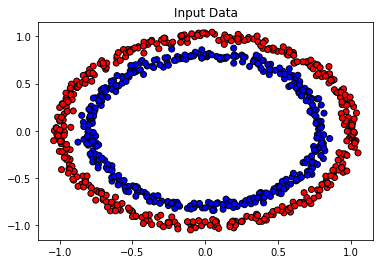

In [11]:
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
plt.title("Input Data")
plt.scatter(samples[:, 0], samples[:, 1], c=labels, cmap=cm_bright,edgecolors='k')
plt.show()

## First attempt: no activation function

In [168]:
model = keras.Sequential()
model.add(keras.layers.Dense(3, activation =None, input_shape = (2,)))
model.add(keras.layers.Dense(4, activation =None))
model.add(keras.layers.Dense(1, activation =None))
model.summary()

Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_85 (Dense)             (None, 3)                 9         
_________________________________________________________________
dense_86 (Dense)             (None, 4)                 16        
_________________________________________________________________
dense_87 (Dense)             (None, 1)                 5         
Total params: 30
Trainable params: 30
Non-trainable params: 0
_________________________________________________________________


In [169]:
model.compile(optimizer ='sgd', loss = 'binary_crossentropy', metrics=['accuracy'])
history = model.fit(samples, labels, epochs = 25, batch_size = 100, validation_split = 0.3)

Train on 560 samples, validate on 240 samples
Epoch 1/25
560/560 [==============================] - 1s 1ms/sample - loss: 4.6731 - accuracy: 0.4732 - val_loss: 4.0242 - val_accuracy: 0.4417
Epoch 2/25
560/560 [==============================] - 0s 110us/sample - loss: 3.9891 - accuracy: 0.5196 - val_loss: 3.7150 - val_accuracy: 0.5458
Epoch 3/25
560/560 [==============================] - 0s 109us/sample - loss: 5.0227 - accuracy: 0.5571 - val_loss: 8.3167 - val_accuracy: 0.4417
Epoch 4/25
560/560 [==============================] - 0s 116us/sample - loss: 7.3557 - accuracy: 0.4929 - val_loss: 8.3101 - val_accuracy: 0.4417
Epoch 5/25
560/560 [==============================] - 0s 119us/sample - loss: 7.3493 - accuracy: 0.4911 - val_loss: 8.2464 - val_accuracy: 0.4542
Epoch 6/25
560/560 [==============================] - 0s 115us/sample - loss: 7.2943 - accuracy: 0.4982 - val_loss: 8.0921 - val_accuracy: 0.4500
Epoch 7/25
560/560 [==============================] - 0s 115us/sample - loss: 7.

In [17]:
def plot_loss_acc(history):    
    plt.plot(history.history['val_loss'])
    plt.title('Model \'s loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.show()
    plt.plot(history.history['val_accuracy'])
    plt.title('Model \'s accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.show()

As it can be understood from the plots, the model is not capble of classifying the circles since it couldn't be trained properly without a proper activation function for each layer. Thus adding an activation function to the hidden layers and the output layer can boost the model's accuracy.

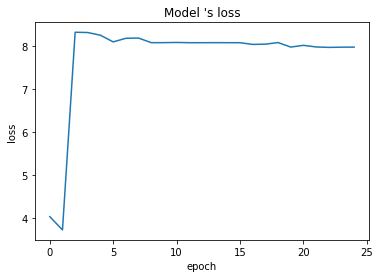

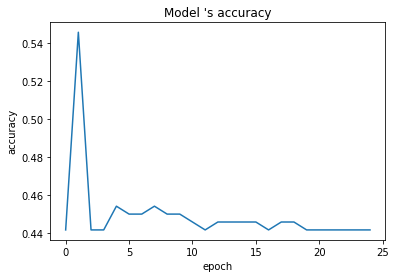

In [171]:
plot_loss_acc(history)

## Second attempt: Linear activation function for all layers

In [165]:
model = keras.Sequential()
model.add(keras.layers.Dense(3, activation ='linear', input_shape = (2,)))
model.add(keras.layers.Dense(4, activation ='linear'))
model.add(keras.layers.Dense(1, activation ='linear'))
model.summary()

Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_82 (Dense)             (None, 3)                 9         
_________________________________________________________________
dense_83 (Dense)             (None, 4)                 16        
_________________________________________________________________
dense_84 (Dense)             (None, 1)                 5         
Total params: 30
Trainable params: 30
Non-trainable params: 0
_________________________________________________________________


In [180]:
model.compile(optimizer ='sgd', loss = 'binary_crossentropy', metrics=['accuracy'])
history = model.fit(samples, labels, epochs = 25, batch_size = 100, validation_split = 0.3)

Train on 560 samples, validate on 240 samples
Epoch 1/25
560/560 [==============================] - 1s 1ms/sample - loss: 7.5472 - accuracy: 0.5107 - val_loss: 8.0981 - val_accuracy: 0.4750
Epoch 2/25
560/560 [==============================] - 0s 110us/sample - loss: 7.5472 - accuracy: 0.5107 - val_loss: 8.0981 - val_accuracy: 0.4750
Epoch 3/25
560/560 [==============================] - 0s 116us/sample - loss: 7.5472 - accuracy: 0.5107 - val_loss: 8.0981 - val_accuracy: 0.4750
Epoch 4/25
560/560 [==============================] - 0s 112us/sample - loss: 7.5472 - accuracy: 0.5107 - val_loss: 8.0981 - val_accuracy: 0.4750
Epoch 5/25
560/560 [==============================] - 0s 121us/sample - loss: 7.5472 - accuracy: 0.5107 - val_loss: 8.0981 - val_accuracy: 0.4750
Epoch 6/25
560/560 [==============================] - 0s 122us/sample - loss: 7.5472 - accuracy: 0.5107 - val_loss: 8.0981 - val_accuracy: 0.4750
Epoch 7/25
560/560 [==============================] - 0s 143us/sample - loss: 7.

The model trained in this section is a little more promising than the previous one due to the usage of an activation function in the layers (especially the output layer); but using a linear activation function in all layers is as if there isn't actually a network of neurons since the combination of a number of linear functions is also a linear function thus making the network act like a single neuron. It's better to use the linear activation function for the output layer in combination with activation functions such as ReLu for the hidden layers.

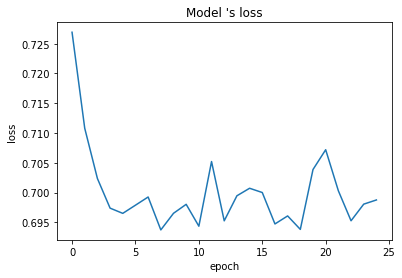

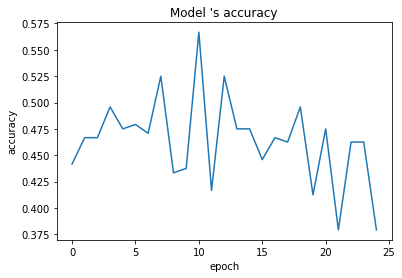

In [167]:
plot_loss_acc(history)

## Third attempt: Using mse as a common regression loss function

In [148]:
model = keras.Sequential()
model.add(keras.layers.Dense(3, activation ='linear', input_shape = (2,)))
model.add(keras.layers.Dense(4, activation ='linear'))
model.add(keras.layers.Dense(1, activation ='linear'))
model.summary()

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_75 (Dense)             (None, 3)                 9         
_________________________________________________________________
dense_76 (Dense)             (None, 4)                 16        
_________________________________________________________________
dense_77 (Dense)             (None, 1)                 5         
Total params: 30
Trainable params: 30
Non-trainable params: 0
_________________________________________________________________


In [172]:
model.compile(optimizer ='sgd', loss = 'mse', metrics=['accuracy'])
history = model.fit(samples, labels, epochs = 25, batch_size = 100, validation_split = 0.3)

Train on 560 samples, validate on 240 samples
Epoch 1/25
560/560 [==============================] - 1s 1ms/sample - loss: 9.4712 - accuracy: 0.4929 - val_loss: 1.9491 - val_accuracy: 0.4708
Epoch 2/25
560/560 [==============================] - 0s 116us/sample - loss: 1.2518 - accuracy: 0.5089 - val_loss: 0.8334 - val_accuracy: 0.4792
Epoch 3/25
560/560 [==============================] - 0s 116us/sample - loss: 0.6325 - accuracy: 0.5125 - val_loss: 0.5341 - val_accuracy: 0.4708
Epoch 4/25
560/560 [==============================] - 0s 110us/sample - loss: 0.4362 - accuracy: 0.5143 - val_loss: 0.4051 - val_accuracy: 0.4750
Epoch 5/25
560/560 [==============================] - 0s 117us/sample - loss: 0.3531 - accuracy: 0.5143 - val_loss: 0.3442 - val_accuracy: 0.4625
Epoch 6/25
560/560 [==============================] - 0s 122us/sample - loss: 0.3096 - accuracy: 0.5161 - val_loss: 0.3054 - val_accuracy: 0.4667
Epoch 7/25
560/560 [==============================] - 0s 120us/sample - loss: 0.

As it can be perceived from the plots below, a suitable loss function for regression problems cannot also be a proper choice for a classification problem. That's because in classification problems (in this case binary classification) there's a very particular set of possible output values thus a loss function such as mse which deals with continuous values, can't be very well defined since it penalizes errors in an incompatible way.

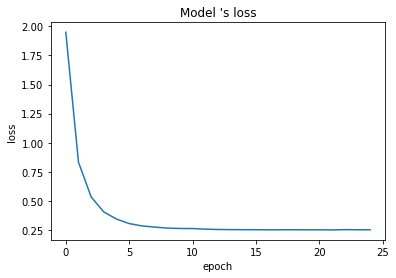

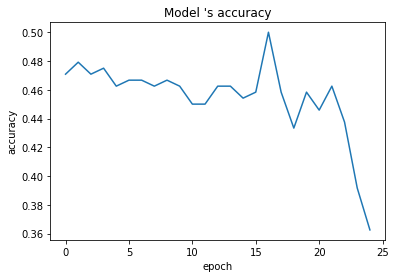

In [173]:
plot_loss_acc(history)

## Fourth attempt: Using a neural network with a single hidden layer

In [174]:
model = keras.Sequential()
model.add(keras.layers.Dense(5, activation ='relu', input_shape = (2,)))
model.add(keras.layers.Dense(1, activation ='linear'))
model.summary()

Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_88 (Dense)             (None, 5)                 15        
_________________________________________________________________
dense_89 (Dense)             (None, 1)                 6         
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


In [159]:
model.compile(optimizer ='sgd', loss = 'binary_crossentropy', metrics=['accuracy'])
history = model.fit(samples, labels, epochs = 25, batch_size = 100, validation_split = 0.3)

Train on 560 samples, validate on 240 samples
Epoch 1/25
560/560 [==============================] - 1s 1ms/sample - loss: 0.6325 - accuracy: 0.6857 - val_loss: 0.6341 - val_accuracy: 0.6625
Epoch 2/25
560/560 [==============================] - 0s 96us/sample - loss: 0.6316 - accuracy: 0.6857 - val_loss: 0.6330 - val_accuracy: 0.6667
Epoch 3/25
560/560 [==============================] - 0s 109us/sample - loss: 0.6311 - accuracy: 0.6929 - val_loss: 0.6324 - val_accuracy: 0.6708
Epoch 4/25
560/560 [==============================] - 0s 110us/sample - loss: 0.6303 - accuracy: 0.6982 - val_loss: 0.6313 - val_accuracy: 0.6792
Epoch 5/25
560/560 [==============================] - 0s 111us/sample - loss: 0.6297 - accuracy: 0.6911 - val_loss: 0.6305 - val_accuracy: 0.6792
Epoch 6/25
560/560 [==============================] - 0s 103us/sample - loss: 0.6288 - accuracy: 0.6982 - val_loss: 0.6298 - val_accuracy: 0.6792
Epoch 7/25
560/560 [==============================] - 0s 110us/sample - loss: 0.6

In this section, the ReLu activation function and a linear activation function are used for the hidden layer and the output layer accordingly since they usually work fine with binary classification problems. It is a known fact that a neural network with a single hidden layer can model any problem if the number of neurons in the layer is big enough (universal approximator). Thus it is not a long shot to expect such model to work just fine in this particular problem. Though a higher accuracy could be reached easier with more hidden layers, the accuracy of this model is also acceptible.

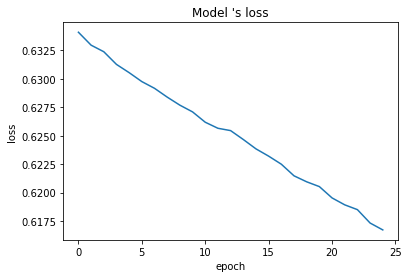

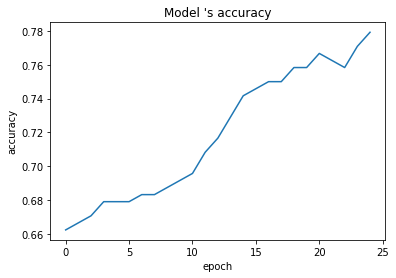

In [161]:
plot_loss_acc(history)

## Fifth attempt: Adjusting the learning rate

In [12]:
model = keras.Sequential()
model.add(keras.layers.Dense(5, activation ='relu', input_shape = (2,)))
model.add(keras.layers.Dense(1, activation ='linear'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 5)                 15        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6         
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


In [13]:
def plot_loss_acc_rate(history, learning_rate):    
    plt.plot(history.history['val_loss'])
    plt.title('Model \'s loss, learning rate = '+str(learning_rate))
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.show()
    plt.plot(history.history['val_accuracy'])
    plt.title('Model \'s accuracy, learning rate = '+str(learning_rate))
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.show()

As it can be percieved from the plots below, 0.01 learning rate is the best fit among the learning rates used with this particular model. Less amounts for learning rate also work fine but the process of learning in those cases is slower and since the batch size isn't exceptionally small, greater learning rates such as 0.005 and 0.01 (compared to the 0.001 default value) can lead to quicker training and higher accuracies in a particular number of epochs. But in my opinion higher learning rates such as 0.05 can lead to oscillation around the optimal point, making them a less suitable choice for this particular model

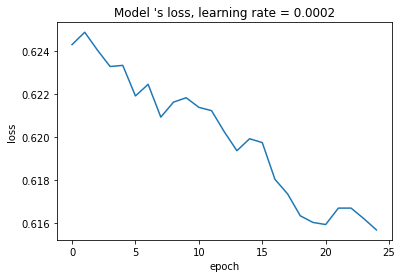

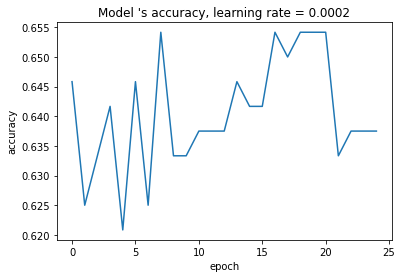

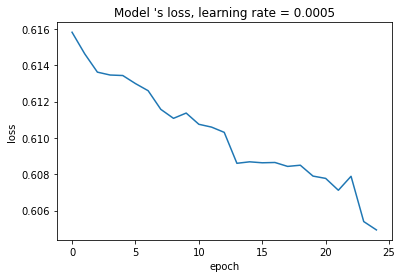

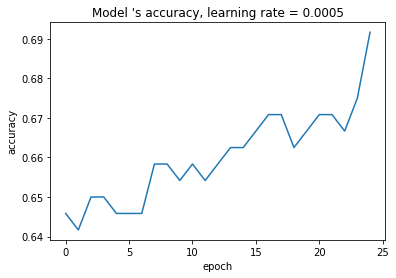

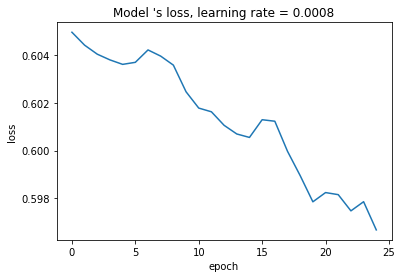

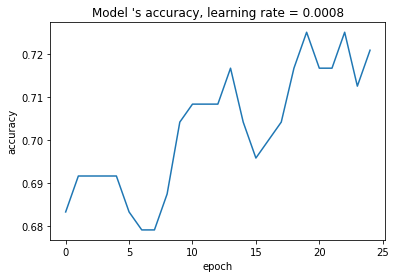

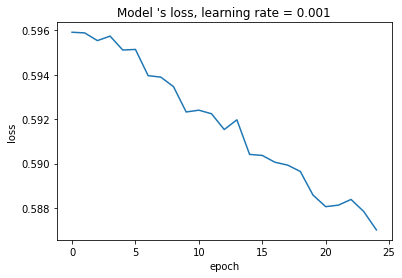

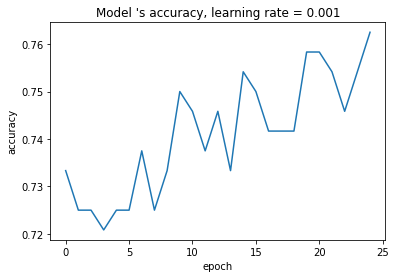

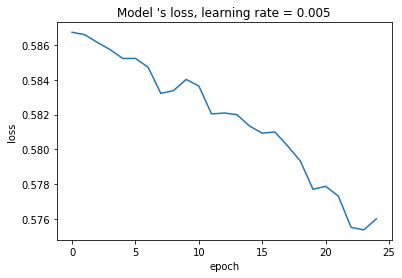

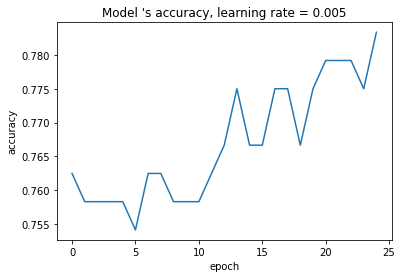

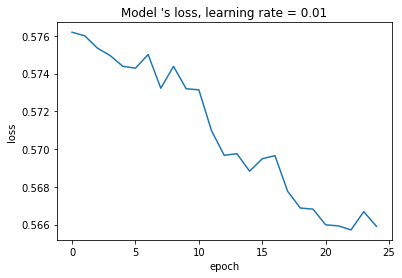

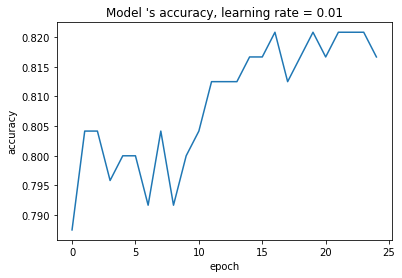

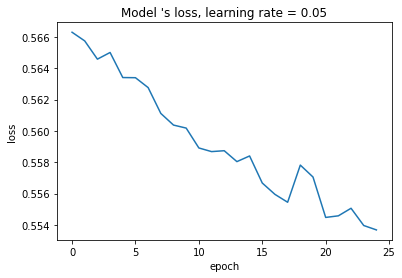

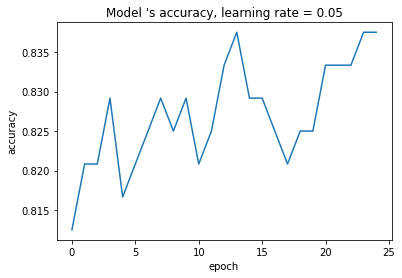

In [16]:
learning_rates = [0.0002, 0.0005, 0.0008, 0.001, 0.005, 0.01, 0.05]
for learning_rate in learning_rates:
    model.compile(optimizer ='sgd',learning_rate =learning_rate, loss = 'binary_crossentropy', metrics=['accuracy'])
    history = model.fit(samples, labels, epochs = 25, batch_size = 100, validation_split = 0.3, verbose =0)
    plot_loss_acc_rate(history, learning_rate)

## Sixth attempt: Finding a good NN

As I mentioned before, the Relu activation funcion and a linear activation function for the hidden layers and the output layers accordingly, are proven to be good choices in binary classification problems. This statement is proved to be true to me as well according to my personal experiments with this problem. I chosed two layers of 10 neurons for the architecture of my model since I found them to be accurate yet not leading to overfitting. Binary cross entropy is of course the best choice for loss function since we're dealing with a binary classification problem. The learning rate is equal to 0.06 since it needed to be small enough to be compatible with the batch size (64) and yet not to small to affect the training speed.

In [340]:
model = keras.Sequential()
model.add(keras.layers.Dense(10, activation ='relu', input_shape = (2,)))
model.add(keras.layers.Dense(10, activation ='relu'))
model.add(keras.layers.Dense(1, activation ='linear'))
model.summary()

Model: "sequential_59"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_177 (Dense)            (None, 10)                30        
_________________________________________________________________
dense_178 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_179 (Dense)            (None, 1)                 11        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


In [359]:
model.compile(optimizer ='sgd',learning_rate = 0.06, loss = 'binary_crossentropy', metrics=['accuracy'])
history = model.fit(samples, labels, epochs = 30, batch_size = 64, validation_split = 0.3, verbose = 0)


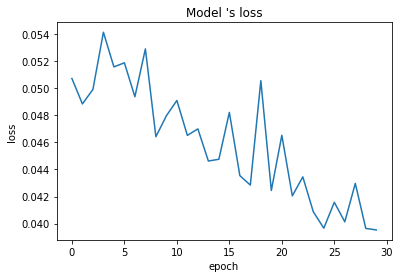

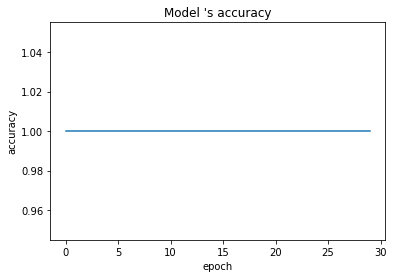

In [360]:
plot_loss_acc(history)

## Part II

In [375]:
from tensorflow.keras.datasets import fashion_mnist

In [383]:
(training_data, training_labels), (test_data, test_labels) = fashion_mnist.load_data()

It's better to normalize the data first since in that case the NN will learn quicker

In [421]:
training_data = training_data/255
test_data = test_data/255

A single hidden layer of 128 (it's good to use powers of two) is used with the Relu activation function since it's known to work just fine with multi-class classification problems. An output layer of 10 (since there are 10 classes of clothing in the dataset) is chosen with the softmax activation function.

In [435]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(128, activation ='relu'))
model.add(keras.layers.Dense(10, activation ='softmax'))

model.summary()

Model: "sequential_76"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_10 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_208 (Dense)            (None, 128)               100480    
_________________________________________________________________
dense_209 (Dense)            (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


The adam optimizer worked better than the conventional sgd. The loss function had to be categorical cross entropy since we're dealing with a mult-class classification problem and I found the batch size 1024 to work well with repect to the number of samples in the dataset.

In [445]:
model.compile(optimizer ='adam', learning_rate = 0.05, loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(training_data, training_labels, epochs = 30, batch_size = 1024)

Train on 60000 samples
Epoch 1/30
60000/60000 [==============================] - 1s 16us/sample - loss: 0.2945 - accuracy: 0.8959
Epoch 2/30
60000/60000 [==============================] - 1s 9us/sample - loss: 0.2940 - accuracy: 0.8959
Epoch 3/30
60000/60000 [==============================] - 1s 9us/sample - loss: 0.2936 - accuracy: 0.8961
Epoch 4/30
60000/60000 [==============================] - 1s 9us/sample - loss: 0.2932 - accuracy: 0.8960
Epoch 5/30
60000/60000 [==============================] - 1s 9us/sample - loss: 0.2933 - accuracy: 0.8964
Epoch 6/30
60000/60000 [==============================] - 1s 9us/sample - loss: 0.2930 - accuracy: 0.8962
Epoch 7/30
60000/60000 [==============================] - 1s 9us/sample - loss: 0.2925 - accuracy: 0.8965
Epoch 8/30
60000/60000 [==============================] - 1s 9us/sample - loss: 0.2925 - accuracy: 0.8967
Epoch 9/30
60000/60000 [==============================] - 1s 10us/sample - loss: 0.2921 - accuracy: 0.8968
Epoch 10/30
60000/600

In [451]:
predicted_labels =model.predict_classes(test_data)
confusion_matrix = tensorflow.math.confusion_matrix(labels=test_labels, predictions=predicted_labels).numpy()

The confusion matrix is plotted in the cell below. As it can be observed, the numbers in the main diagonal row are significantly greater than other indices, proving the model to show good accuracy with the test data

In [455]:
print(confusion_matrix)

[[813   1  14  37  10   2 107   1  15   0]
 [  4 967   0  22   4   0   3   0   0   0]
 [ 12   2 781  17 119   0  66   0   3   0]
 [ 21  12  16 885  38   0  24   0   4   0]
 [  1   1  85  29 831   0  50   0   3   0]
 [  0   0   0   1   0 945   0  34   2  18]
 [134   3  94  35  86   0 634   0  14   0]
 [  0   0   0   0   0  31   0 940   0  29]
 [  5   1   9   7   5   2   6   6 959   0]
 [  1   0   0   0   0  11   1  36   0 951]]
